
# ITAI 2377 Lab 04: Deep Learning Data Preprocessing

**Instructor:** [Your Name]
**Date:** [Date]

## Introduction

Welcome to Lab 04!  We'll explore the critical role of data preprocessing in deep learning. Even though models can extract features, preprocessing is essential for optimal performance. We'll cover various data types and apply preprocessing techniques. Resources in Google Colab are limited, so efficient coding is key!

## Why Preprocess?

Why preprocess when models extract features?

*   **Standardization:** Models need consistent data formats and ranges.
*   **Noise/Errors:** Raw data is messy. Preprocessing cleans it up.
*   **Efficiency:** Cleaner data means faster training.
*   **Results:** Good preprocessing helps models perform their best.

Think of preprocessing as a personal trainer for your model.

## Data Types and Preprocessing Techniques

### 1. Image Data



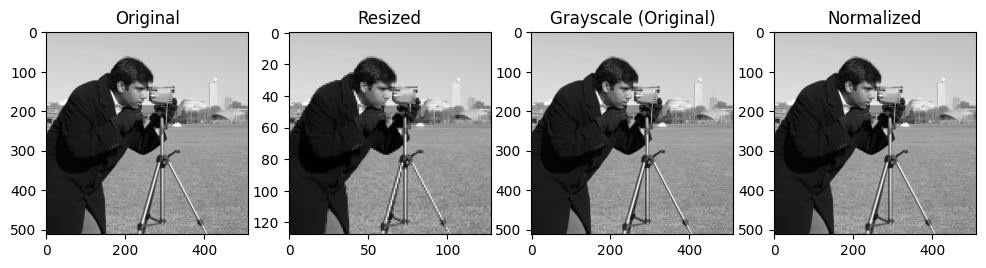

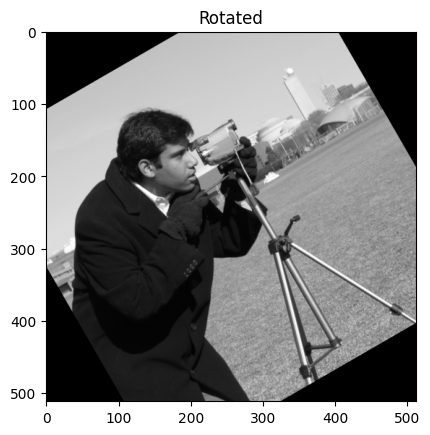

In [2]:
import cv2
import numpy as np
from skimage import data, img_as_float
import matplotlib.pyplot as plt

# Load a sample image (replace with your image path if you have one)
image = data.camera()  # Or use: image = cv2.imread("path/to/your/image.jpg")

# Resizing (Student Code: Resize the image to (128, 128))
# Hint: Use cv2.resize()
# YOUR CODE HERE
resized_image = cv2.resize(image, (128, 128))


# Color space conversion (to grayscale)
# The image is already grayscale, no conversion needed
# gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# Normalization (pixel values 0-1)
normalized_image = img_as_float(image)

# Display images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1, 4, 2), plt.imshow(resized_image, cmap='gray'), plt.title("Resized")
plt.subplot(1, 4, 3), plt.imshow(image, cmap='gray'), plt.title("Grayscale (Original)") # Display the original grayscale image
plt.subplot(1, 4, 4), plt.imshow(normalized_image, cmap='gray'), plt.title("Normalized")
plt.show()

# Data Augmentation (rotation - Student Code: Rotate by 30 degrees)
# Hint: Use cv2.getRotationMatrix2D and cv2.warpAffine
angle = 30 #YOUR CODE HERE
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(rotated_image, cmap='gray'), plt.title("Rotated")
plt.show()

### 2. Text Data



In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab')

text = "This is a fun example sentence with stop words and punctuation!"

# Tokenization (lowercase)
tokens = word_tokenize(text.lower())

# Stop word removal (Student Code: Remove stop words and punctuation)
# Hint: Use the 'stop_words' set and list comprehension
stop_words = set(stopwords.words('english'))
# YOUR CODE HERE
filtered_tokens = [w for w in tokens if not w in stop_words and w not in string.punctuation]


# Lemmatization (Student Code: Lemmatize the filtered tokens)
# Hint: Use WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()
# YOUR CODE HERE
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]


print("Original:", text)
print("Tokens:", tokens)
print("Filtered:", filtered_tokens)
print("Lemmatized:", lemmatized_tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original: This is a fun example sentence with stop words and punctuation!
Tokens: ['this', 'is', 'a', 'fun', 'example', 'sentence', 'with', 'stop', 'words', 'and', 'punctuation', '!']
Filtered: ['fun', 'example', 'sentence', 'stop', 'words', 'punctuation']
Lemmatized: ['fun', 'example', 'sentence', 'stop', 'word', 'punctuation']


### 3. Time Series Data



In [5]:
import pandas as pd
import numpy as np

# Sample data (with a missing value)
data = {'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']),
        'Value': [10, 12, 15, np.nan, 18]}

df = pd.DataFrame(data)

# Missing value handling (Student Code: Use backward fill to fill missing values)
# Hint: Use fillna() with method='bfill'
# YOUR CODE HERE
df['Value'].fillna(method='bfill', inplace=True)

# Normalization (min-max scaling - Student Code: Normalize the 'Value' column)
# YOUR CODE HERE
min_val = df['Value'].min()
max_val = df['Value'].max()
df['Normalized'] = (df['Value'] - min_val) / (max_val - min_val)

print(df)

        Date  Value  Normalized
0 2024-01-01   10.0       0.000
1 2024-01-02   12.0       0.250
2 2024-01-03   15.0       0.625
3 2024-01-04   18.0       1.000
4 2024-01-05   18.0       1.000


/tmp/ipython-input-3069143717.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-3069143717.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Value'].fillna(method='bfill', inplace=True)


### 4. Optional: Video Data (Simplified)



In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving file_example_MP4_480_1_5MG.mp4 to file_example_MP4_480_1_5MG.mp4
User uploaded file "file_example_MP4_480_1_5MG.mp4" with length 1570024 bytes


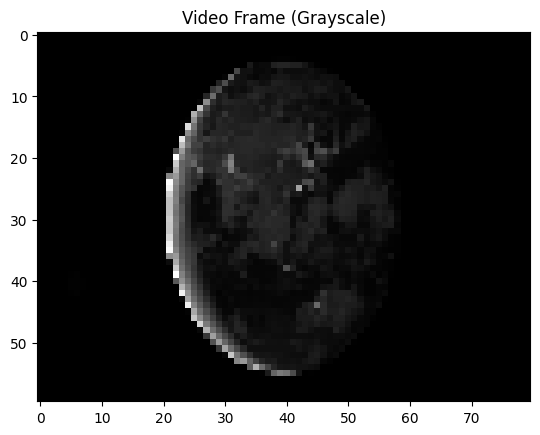

In [15]:
import cv2
import matplotlib.pyplot as plt # Import matplotlib

# Load a video (replace with your video path or a small sample video if possible)
video_path = "file_example_MP4_480_1_5MG.mp4"  # Replace with your video file path (or upload one to Colab)
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video")
else:
    ret, frame = cap.read()  # Read a single frame
    if ret:
        # Resize the frame (for faster processing - Student Code: Resize to (80, 60))
        # YOUR CODE HERE
        resized_frame = cv2.resize(frame, (80, 60))

        # Convert to grayscale
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)  # OpenCV uses BGR

        # Display the frame (optional)
        plt.imshow(gray_frame, cmap='gray')
        plt.title("Video Frame (Grayscale)")
        plt.show()

    cap.release()
# cv2.destroyAllWindows()   # cv2.destroyAllWindows() function is used to close and destroy all the HighGUI windows that were created by cv2.imshow(). Function is not support in google colab.

### 5. Optional: Audio Data (Simplified)



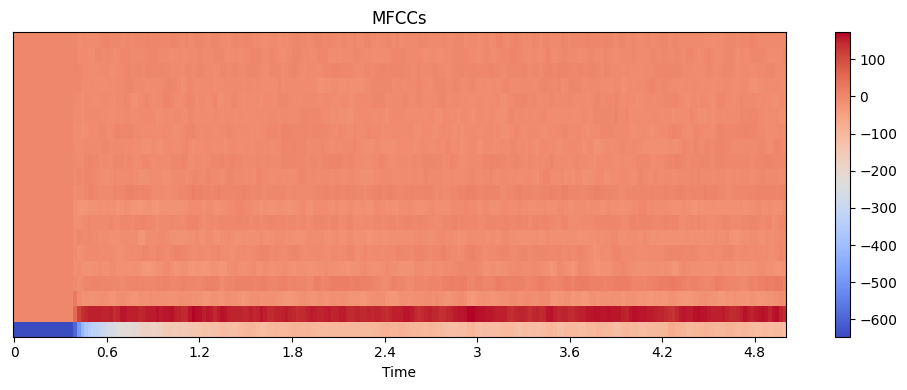

MFCCs shape: (20, 216)
Normalized MFCCs shape: (20, 216)


In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load an audio file (replace with your audio path)
audio_path = "City_Ambi-Street01-1.mp3"  # Replace with your audio file path (or upload one to Colab)
y, sr = librosa.load(audio_path, duration=5)  # Load a maximum of 5 seconds

# Feature extraction (MFCCs - Student Code: Extract 20 MFCCs)
# Hint: Use librosa.feature.mfcc() with n_mfcc=20
# YOUR CODE HERE
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# Display MFCCs (optional)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

# Normalize MFCCs (example)
mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)

print("MFCCs shape:", mfccs.shape)
print("Normalized MFCCs shape:", mfccs_normalized.shape)

In [9]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving City_Ambi-Street01-1.mp3 to City_Ambi-Street01-1.mp3
User uploaded file "City_Ambi-Street01-1.mp3" with length 1037748 bytes


**Tip:** Explore different methods for handling missing values (e.g., backward fill, interpolation).  Consider feature engineering techniques like creating lagged variables.

## Questions (Markdown Cell)

1.  Why is data preprocessing still important even with deep learning's feature extraction capabilities?
Data preprocessing is still important because even though deep learning can extract features automatically, the raw input quality directly affects model performance. Preprocessing ensures that data is consistent, clean, and scaled properly, which leads to faster convergence, reduced noise, and better generalization. Without it, training may become unstable and accuracy may drop.
2.  Explain the difference between normalization and standardization. When would you choose one over the other?
Normalization rescales data into a fixed range, usually [0,1] or [-1,1], while standardization shifts data to have a mean of 0 and a standard deviation of 1. Normalization is better when working with data like image pixel values that must be in a bounded range, whereas standardization is better when features follow a roughly Gaussian distribution or when algorithms assume centered data, such as linear models or PCA.
3.  Describe a scenario where data augmentation would be particularly useful.
Data augmentation is particularly useful in image classification when the dataset is small, such as in medical imaging tasks like detecting diseases from X-rays. Since collecting large labeled datasets is difficult, augmentation techniques like rotation, flipping, or noise injection help increase dataset size, improve robustness, and reduce overfitting.
4.  What are some potential challenges or pitfalls to avoid during data preprocessing?  How can you mitigate them?
Challenges during data preprocessing include data leakage when test data is used in preprocessing, overprocessing that removes too much useful information, inconsistent transformations between training and testing sets, and unintentional bias introduction. These can be mitigated by splitting data before preprocessing, keeping transformations minimal and task-specific, using preprocessing pipelines, and validating with domain knowledge.
5.  Choose one of the data types covered in the lab (images, text, time series).  Describe a specific real-world application that uses deep learning and explain how preprocessing would be crucial for that application.
In text data, a real-world application is sentiment analysis of customer reviews where deep learning models like LSTMs or Transformers are used. Preprocessing is crucial because text must be tokenized, cleaned by removing unnecessary characters, normalized into lowercase, and transformed into embeddings or numerical vectors. Without these steps, the model would misinterpret words, be affected by noise, and fail to learn meaningful patterns.

## Deliverables

*   **Completed Notebook (PDF):** This notebook with your code, outputs, and answers to the questions.
*   **Reflective Journal:** A short journal (1-2 pages) reflecting on your learning experience in this lab.  Consider the following prompts:
    *   What did you learn in this lab?
    *   What challenges did you encounter? How did you overcome them?
    *   Were there any concepts that you already knew?
    *   Did anything surprise you?
    *   What are some potential real-world applications of the preprocessing techniques you learned?
    *   What further learning or exploration would you like to pursue related to data preprocessing?

Remember to save your notebook with the outputs and convert it to PDF before submission. Good luck!
```

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119">https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119</a></li>
  </ol>
</div>